## Exploaration et Analyse textuelles 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#pour le texte 
import nltk
from wordcloud import WordCloud 
# Initialisation NLTK 
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/papadiadji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/papadiadji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
data = pd.read_csv("./data/Reviews.csv")

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
print(f"Nombre de lignes: {data.shape[0]}")
print(f"Nombre de lignes: {data.shape[1]}")

Nombre de lignes: 568454
Nombre de lignes: 10


#### notre dataFrame contient 568 454 observations avec 12 colonnes qui constituent nos variables explicatives . Nous avons entre autres le nom de profil de l'utilisateur , le score , la date de soumission , un texte sur l'avis du client et un bref resumé de son préssentiment sur le produit . 

In [6]:
#data.info 

data.isna().sum()
data['ProfileName'].fillna("Anonymous", inplace=True)
data['Summary'].fillna("", inplace=True)


#data.describe(include='object')

/tmp/ipykernel_71004/344767605.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ProfileName'].fillna("Anonymous", inplace=True)
/tmp/ipykernel_71004/344767605.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

#### En resumé , 256 059 utilisateurs ont donnée des avis ( certains users reviennent beaucoup de fois ) sur 74 258 prduits 

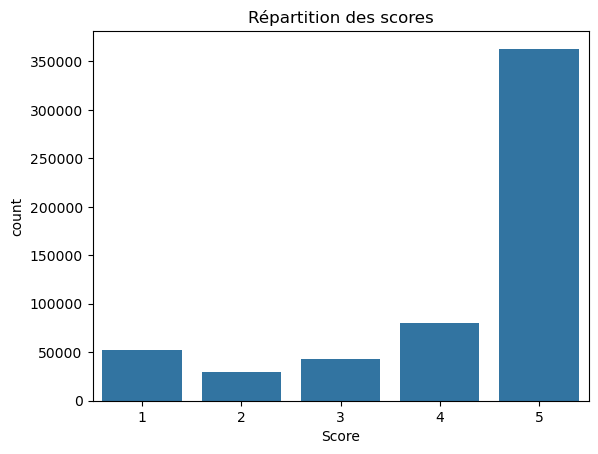

In [7]:
sns.countplot(data = data , x = 'Score')
plt.title("Répartition des scores") 
plt.show()

### Analyse de la répartition des scores 
##### La majorité des notes attribuées sont de 5 étoiles, ce qui traduit un fort biais vers le positif.
##### Ce phénomène peut s’expliquer par le fait que les utilisateurs ont tendance à laisser un avis lorsqu’ils sont très satisfaits du produit.
##### À l’inverse, les avis plus négatifs (1 à 3 étoiles) sont moins fréquents et plus dispersés, probablement parce que :
##### les clients insatisfaits n’écrivent pas systématiquement d’avis ;
##### certains attribuent une note aléatoire (entre 1, 2 ou 3) sans réflexion précise ;
#### le 4 étoiles semble parfois refléter une satisfaction modérée ou une hésitation.

 ##### Conclusion : Ce déséquilibre des classes devra être pris en compte dans les modèles de classification (ex. : en utilisant des techniques de rééchantillonnage ou des métriques adaptées comme le F1-score pondéré)

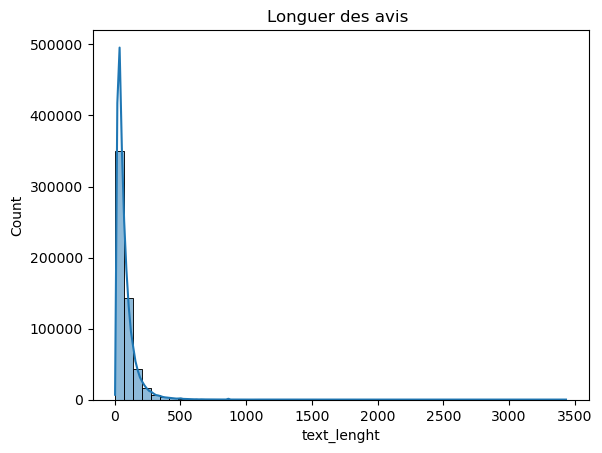

count    568454.000000
mean         80.264023
std          79.455384
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: text_lenght, dtype: float64

In [8]:
# on regarde ici la longueur des avis 

data['text_lenght'] = data['Text'].astype(str).apply(lambda x : len(x.split()))

sns.histplot(data['text_lenght'], bins = 50 , kde = True)
plt.title("Longuer des avis ")
plt.show()

data['text_lenght'].describe()

#####  la présence d’avis très longs peut influencer l’analyse de sentiment ou les performances des modèles NLP.
##### Ces cas extrêmes devront peut-être être tronqués ou analysés séparément pour éviter qu’ils ne biaisent l’apprentissage.

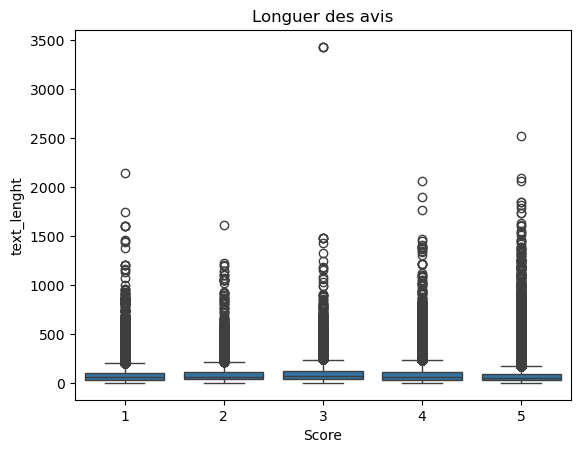

In [9]:
sns.boxplot(data = data , x = 'Score' , y = 'text_lenght')
plt.title("Longuer des avis")
plt.show()

Text(0.5, 1.0, 'Score selon la longueur des avis')

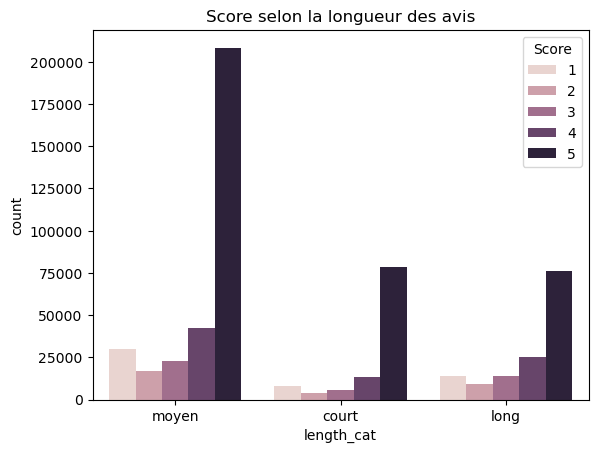

In [10]:
def length_category(x): 
    if x < 30 : 
        return 'court' 
    elif x >= 30 and  x < 100 : 
        return 'moyen' 
    else : 
        return 'long'
    
data['length_cat']=data['text_lenght'].apply(length_category)

sns.countplot(data=data , x ='length_cat', hue='Score')
plt.title("Score selon la longueur des avis")

#### Tokenisation et Prétraitement du texte

In [11]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re 

In [12]:
#  Imports nécessaires
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#pour la lemmatisation
from  nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


# 
nltk.download('stopwords')
nltk.download('punkt')

#  Définir les stopwords anglais
stop_words = set(stopwords.words('english'))

#  Fonction de prétraitement

lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove non-letter chars
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/papadiadji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/papadiadji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
data.isna().sum()

sample = data['Text'].iloc[0]

print("Avant :", sample)
print("Après nettoyage + lemmatisation :", preprocess_text(sample))

Avant : I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Après nettoyage + lemmatisation : ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'product', 'found', 'good', 'quality', 'product', 'look', 'like', 'stew', 'processed', 'meat', 'smell', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


In [14]:
import nltk
nltk.download('punkt_tab')
# Recrée le dossier et télécharge correctement
nltk.download('punkt', download_dir='/home/papadiadji/nltk_data')

# Force l'utilisation de ce chemin uniquement
nltk.data.path.clear()
nltk.data.path.append('/home/papadiadji/nltk_data')

# Test
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/papadiadji/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/papadiadji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
#on ajoute ici une colone pour les textes netoyés 

data['tokens'] = data['Text'].apply(preprocess_text)

In [16]:
import nltk 
from  nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/papadiadji/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/papadiadji/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
def preprocess_text_joined(text): 
    tokens = preprocess_text(text)
    return " ".join(tokens)

data['clean_text'] = data['Text'].apply(preprocess_text_joined)


In [18]:
#Vectorisation TF-IDF : transforme le texte en vecteurs numériques 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features= 5000)

X = vectorizer.fit_transform(data['clean_text'])


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y = data['Score']  #

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100000, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=50, max_depth=15, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.41      0.65      0.51     43073
           2       0.26      0.31      0.28     24532
           3       0.27      0.31      0.29     35139
           4       0.32      0.38      0.35     66467
           5       0.84      0.70      0.76    299243

    accuracy                           0.60    468454
   macro avg       0.42      0.47      0.44    468454
weighted avg       0.65      0.60      0.62    468454



### On remarque que le modele ignore completement les autres classes de 1 à  4 , ce qui est probab lemnt du par le deséquilibre des classes . Nous allons tester un modele logistique avec réequilibrant les classes 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data['target_bin'] = data['Score'].apply(lambda x: 1 if x == 5 else 0)


X_train, X_test, y_train, y_test = train_test_split(X, data['target_bin'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.70      0.79      0.75     40789
           1       0.87      0.81      0.84     72902

    accuracy                           0.81    113691
   macro avg       0.79      0.80      0.79    113691
weighted avg       0.81      0.81      0.81    113691



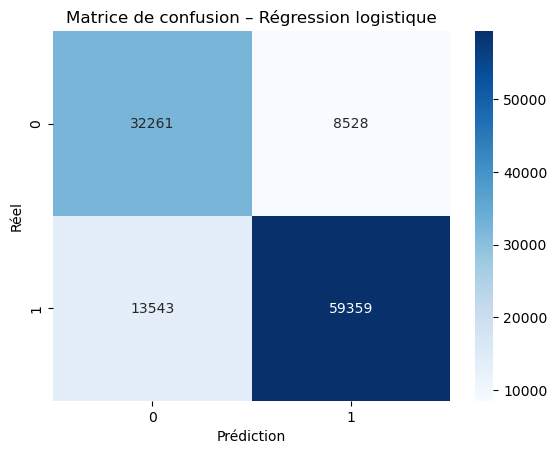

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de confusion – Régression logistique")
plt.show()


In [25]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Mots qui contribuent le plus à prédire la classe 1 (score 5)
top_pos = np.argsort(coefs)[-20:]
top_neg = np.argsort(coefs)[:20]

print(" Mots positifs :")
for idx in top_pos[::-1]:
    print(f"{feature_names[idx]} → {coefs[idx]:.4f}")

print("\n Mots négatifs :")
for idx in top_neg:
    print(f"{feature_names[idx]} → {coefs[idx]:.4f}")


 Mots positifs :
highly → 7.0484
hooked → 6.9706
love → 6.5500
best → 6.2511
amazing → 5.9702
delicious → 5.8335
great → 5.6560
wonderful → 5.2283
perfect → 5.1884
excellent → 5.1427
awesome → 5.1401
fantastic → 4.9023
favorite → 4.8088
amazed → 4.7367
incredible → 4.5821
thank → 4.5658
heaven → 4.5627
skeptical → 4.2837
addicted → 4.2380
fabulous → 3.8592

 Mots négatifs :
worst → -9.2058
star → -7.7372
disappointing → -7.6380
disappointment → -6.8918
awful → -6.2026
unfortunately → -6.0465
however → -6.0361
refund → -5.5727
misleading → -5.2775
threw → -5.1837
horrible → -5.1239
return → -5.0975
drinkable → -5.0092
terrible → -4.8561
disgusting → -4.7328
disappointed → -4.6353
okay → -4.5831
worse → -4.4581
cancelled → -4.4143
hoping → -4.3601
